In [1]:
# Data Science Analysis and Prediction on Real/Fake Job Postings

# With simple ML algorithms, job prediction (classification/clustering) models are built which predict whether 
# a job posting is fradulent or not. In this pandemic, where millions of people have suffered from the job crisis,
# these models can be beneficial.

In [2]:
# End-to-end Scikit-Learn Workflow
# 1. Getting the data ready - Cross-validation
# 2. Handling NaN & categorical data - Preprocessing
# 3. Choosing the right ML algorithms
# 4. Fitting the models to the data & making predictions
# 5. Evaluating the models -- accuracy score/silhouette score
# 6. Display results with plots

In [3]:
# Import libraries
# Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.model_selection import train_test_split

# Classification models -- Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Clustering models -- K-Means, Gaussian Mixtures
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.special import comb
from sklearn.metrics.cluster import adjusted_rand_score
from matplotlib.lines import Line2D

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from plotnine import *

In [4]:
# Path of file
job_postings_file_path = "C:/Users/HP/Documents/CSUF Year 2021-2022/Summer Work/CSV Files/fake_job_postings.csv"
job_postings_data = pd.read_csv(job_postings_file_path)

# Display first 5 rows
job_postings_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


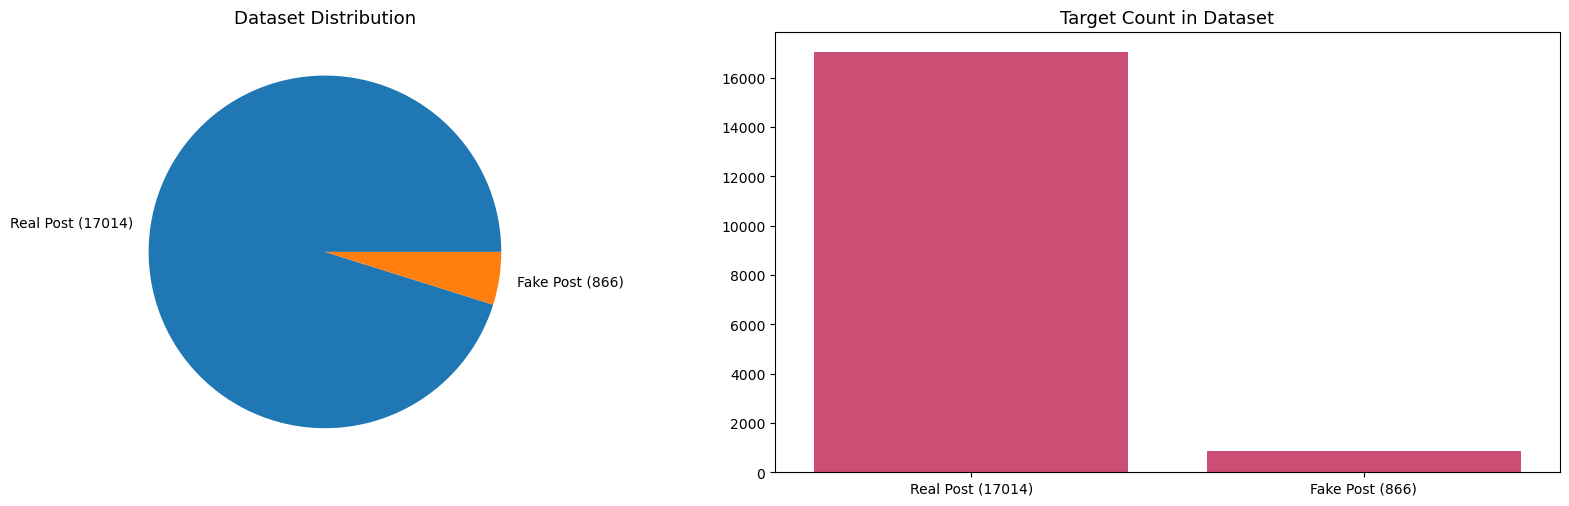

In [5]:
# Real/Fake Job Postings Data Distribution
# Location 
job_postings_data['location'] = job_postings_data['location'].astype(str)
job_postings_data['Loc_1'] = job_postings_data['location'].str.split(',').str[0]
job_postings_data['Loc_2'] = job_postings_data['location'].str.split(',').str[1]
job_postings_data['Loc_3'] = job_postings_data['location'].str.split(',').str[2]

# Target Distribution
fig, axes = plt.subplots(ncols = 2, figsize = (17, 5), dpi = 100)
plt.tight_layout()

job_postings_data["fraudulent"].value_counts().plot(kind = 'pie', ax = axes[0], labels = ['Real Post (17014)', 
                                                                                          'Fake Post (866)'])
temp = job_postings_data["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax = axes[1], color = '#E1396C')

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014)", "Fake Post (866)"])

axes[0].set_title('Dataset Distribution', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

Text(0.5, 1.0, 'Top 20 Departments')

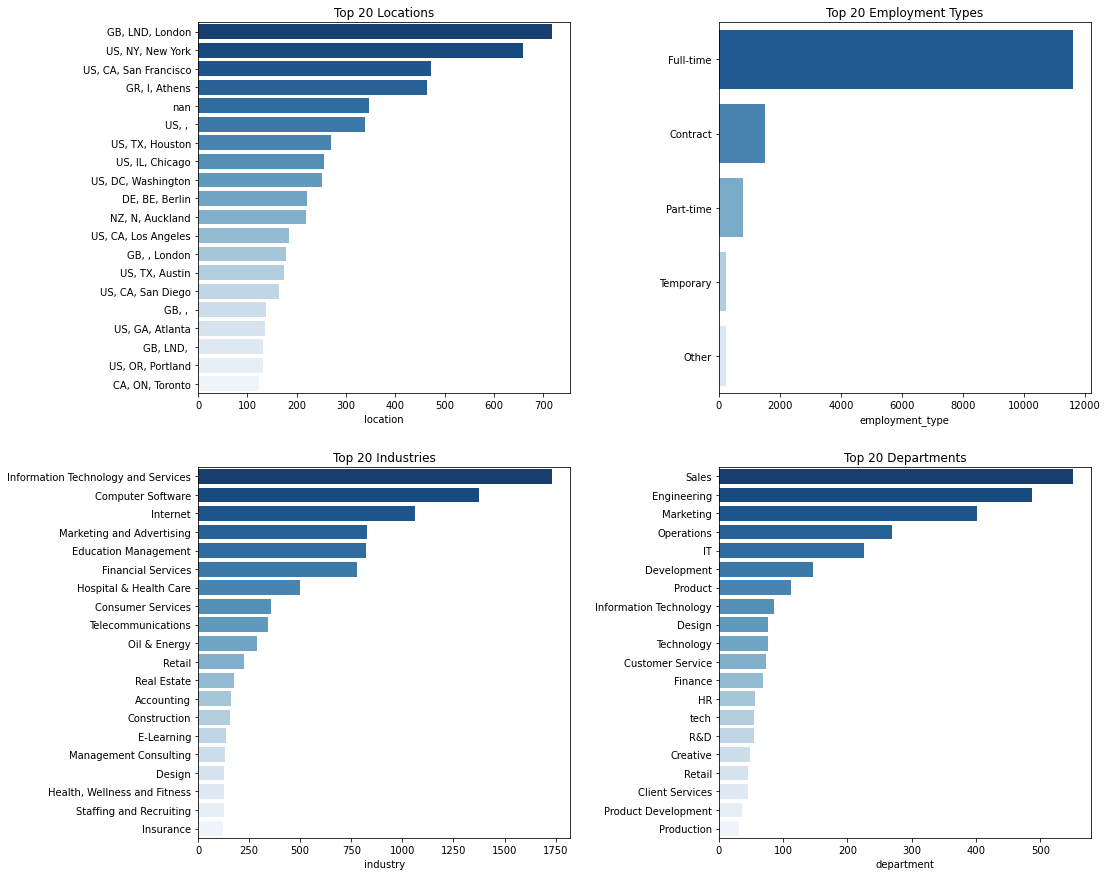

In [6]:
# Top 20 Locations -- Location, Employment Type, Department, & Industry
f1, axes = plt.subplots(2, 2, figsize = (16,15))
axes = axes.flatten()
f1.subplots_adjust(hspace = 0.2, wspace = 0.4)

ax1 = sns.barplot(y = job_postings_data['location'].value_counts()[:20].index, 
                  x = job_postings_data['location'].value_counts()[:20], orient = 'h', ax = axes[0], palette = 'Blues_r')
ax1.set_title("Top 20 Locations")

ax2 = sns.barplot(y = job_postings_data['employment_type'].value_counts()[:20].index, 
                  x = job_postings_data['employment_type'].value_counts()[:20], orient = 'h', ax = axes[1], palette = 'Blues_r')
ax2.set_title("Top 20 Employment Types")

ax3 = sns.barplot(y = job_postings_data['industry'].value_counts()[:20].index, 
                  x = job_postings_data['industry'].value_counts()[:20], orient = 'h', ax = axes[2], palette = 'Blues_r')
ax3.set_title("Top 20 Industries")

ax4 = sns.barplot(y = job_postings_data['department'].value_counts()[:20].index, 
                  x = job_postings_data['department'].value_counts()[:20], orient ='h', ax = axes[3], palette = 'Blues_r')
ax4.set_title("Top 20 Departments")

Text(0.5, 1.0, 'Top 20 Experience Levels Required')

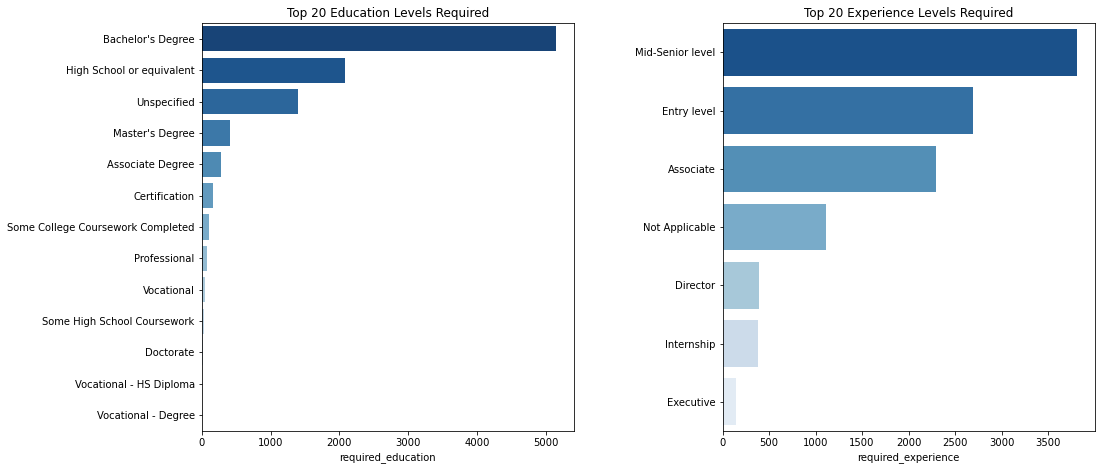

In [7]:
# Top 20 Locations -- Required Education & Required Experience
f1, axes = plt.subplots(1, 2, figsize = (16, 7.5))
axes = axes.flatten()
f1.subplots_adjust(hspace = 0.2, wspace = 0.4)

ax1 = sns.barplot(y = job_postings_data['required_education'].value_counts()[:20].index, 
                  x = job_postings_data['required_education'].value_counts()[:20], orient = 'h', ax = axes[0], palette = 'Blues_r')
ax1.set_title("Top 20 Education Levels Required")

ax2 = sns.barplot(y = job_postings_data['required_experience'].value_counts()[:20].index, 
                  x = job_postings_data['required_experience'].value_counts()[:20], orient = 'h', ax = axes[1], palette = 'Blues_r')
ax2.set_title("Top 20 Experience Levels Required")

Text(0.5, 1.0, 'Top 20 Fraudulent Education Levels')

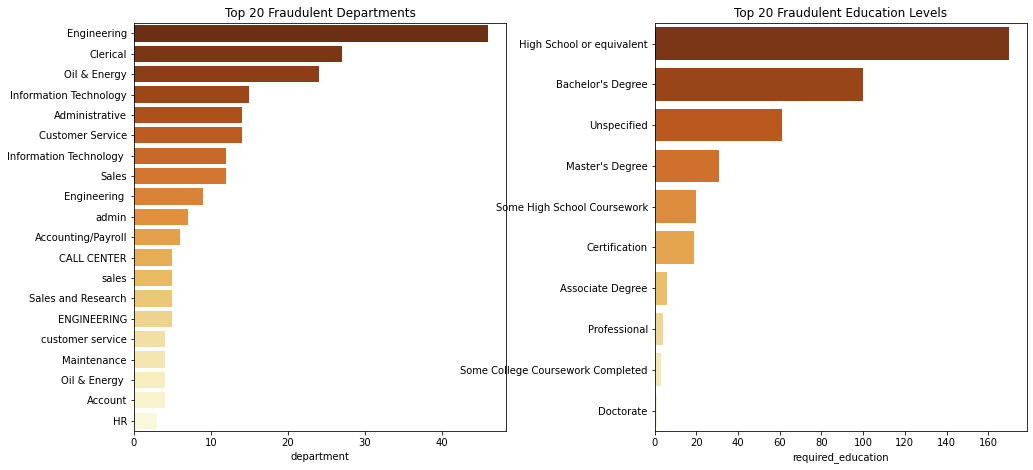

In [8]:
# Visualizing Department & Redquired Education for FRAUD jobs
f1, axes = plt.subplots(1, 2, figsize = (16, 7.5))
axes = axes.flatten()
f1.subplots_adjust(hspace = 0.2, wspace = 0.4)

# Find Fraudulent Postings Only
job_postings_fraud_data = job_postings_data.loc[job_postings_data['fraudulent'] == 1]

ax1 = sns.barplot(y = job_postings_fraud_data['department'].value_counts()[:20].index, 
                  x = job_postings_fraud_data['department'].value_counts()[:20], orient = 'h', ax = axes[0], palette = 'YlOrBr_r')
ax1.set_title("Top 20 Fraudulent Departments")

ax2 = sns.barplot(y = job_postings_fraud_data['required_education'].value_counts()[:20].index, 
                  x = job_postings_fraud_data['required_education'].value_counts()[:20], orient = 'h', ax = axes[1], palette = 'YlOrBr_r')
ax2.set_title("Top 20 Fraudulent Education Levels")

In [9]:
# Data Preprocessing -- Remove missing data, Label encoding, Standardization, & Split into train/test
job_postings_data.isnull().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
Loc_1                      0
Loc_2                    440
Loc_3                    440
dtype: int64

In [10]:
# Remove columns w/ high percentage of missing values
del_cols = ['department', 'salary_range', 'benefits']
job_postings_data = job_postings_data.drop(del_cols, axis = 1)

# Display remaining columns
job_postings_data.columns

Index(['job_id', 'title', 'location', 'company_profile', 'description',
       'requirements', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'Loc_1', 'Loc_2', 'Loc_3'],
      dtype='object')

In [11]:
# Create Target Objects
y = job_postings_data.fraudulent
features = ['job_id', 'title', 'location', 'company_profile', 'description', 'requirements', 'telecommuting', 
            'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 
            'industry', 'function']
X = job_postings_data[features]

# Display first 5 rows
X.head()

,job_id,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [12]:
# Replacing missing data w/ empty string
cat_cols = list(X.columns)

for i in cat_cols:
    if X[i].dtype == 'object':
        X[i] = X[i].replace(np.nan, X[i].mode()[0], regex = True)
        
X.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_3660\1251462556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP\AppData\Local\Temp\ipykernel_3660\1251462556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP\AppData\Local\Temp\ipykernel_3660\1251462556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

job_id                 0
title                  0
location               0
company_profile        0
description            0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

In [13]:
# Label Encoding Categorical Features -- Why? Models cannot take strings as features
le = LabelEncoder()

for i in cat_cols:
    if X[i].dtype == 'object':
        X[i] = le.fit_transform(X[i])

# Display first & last 5 rows
X

C:\Users\HP\AppData\Local\Temp\ipykernel_3660\3936449632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,job_id,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,1,6043,2535,1526,4506,3829,0,1,0,2,4,1,58,22
1,2,2183,1073,50,7255,10526,0,1,0,1,6,1,75,7
2,3,1763,1867,1389,7470,4560,0,1,0,1,5,1,58,18
3,4,299,1703,975,9590,3166,0,1,0,1,5,1,22,31
4,5,975,1741,1210,5724,6495,0,1,1,1,5,1,51,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,268,166,1391,6152,9679,0,1,1,1,5,1,22,31
17876,17877,7101,2734,1546,10355,152,0,1,1,1,5,1,61,0
17877,17878,7579,2875,1430,4258,1789,0,0,0,1,5,1,58,18
17878,17879,4107,1045,1506,7024,443,0,0,1,0,6,6,48,9


In [14]:
# Perform a scalar transformation of dataset
ss = StandardScaler()
X = ss.fit_transform(X)
X = DataFrame(X, columns = features)

# Display first & last 5 rows
X

,job_id,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,-1.731954,0.195647,1.049106,0.988607,-0.681555,-0.798412,-0.211707,0.507330,-0.983580,1.501706,0.081438,-0.483163,0.136639,0.670822
1,-1.731760,-0.995360,-0.561255,-1.968191,-0.030664,1.128012,-0.211707,0.507330,-0.983580,-0.090851,1.121890,-0.483163,0.797588,-1.320836
2,-1.731566,-1.124952,0.313319,0.714161,0.020243,-0.588136,-0.211707,0.507330,-0.983580,-0.090851,0.601664,-0.483163,0.136639,0.139713
3,-1.731373,-1.576670,0.132676,-0.115184,0.522203,-0.989127,-0.211707,0.507330,-0.983580,-0.090851,0.601664,-0.483163,-1.263019,1.865816
4,-1.731179,-1.368090,0.174532,0.355580,-0.393164,-0.031524,-0.211707,0.507330,1.016694,-0.090851,0.601664,-0.483163,-0.135517,-0.125841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,1.731179,-1.586236,-1.560295,0.718168,-0.291825,0.884369,-0.211707,0.507330,1.016694,-0.090851,0.601664,-0.483163,-1.263019,1.865816
17876,1.731373,0.522094,1.268300,1.028672,0.703335,-1.856119,-0.211707,0.507330,1.016694,-0.090851,0.601664,-0.483163,0.253277,-2.250276
17877,1.731566,0.669581,1.423608,0.796295,-0.740275,-1.385228,-0.211707,-1.971103,-0.983580,-0.090851,0.601664,-0.483163,0.136639,0.139713
17878,1.731760,-0.401708,-0.592096,0.948542,-0.085358,-1.772411,-0.211707,-1.971103,1.016694,-1.683408,1.121890,1.593610,-0.252155,-1.055281


In [15]:
# Split into Train & Test (validate) data -- 70-30 distribution
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"No. of training sets: {train_X.shape[0]}")
print(f"No. of testing sets: {test_X.shape[0]}")

No. of training sets: 12516
No. of testing sets: 5364


In [16]:
# Logistic Regression Model -- Classification Algorithm
job_postings_regression_model = LogisticRegression(random_state = 42)

# Fit the model w/ training data + Make predictions
job_postings_regression_model.fit(train_X, train_y)
job_postings_pred1 = job_postings_regression_model.predict(test_X)

# Display accuracy score of model
acc_score1 = accuracy_score(test_y, job_postings_pred1)
acc_perc1 = acc_score1 * 100
print(f"Accuracy score of Logistic Regression Model: {acc_perc1}%")

Accuracy score of Logistic Regression Model: 95.17151379567487%


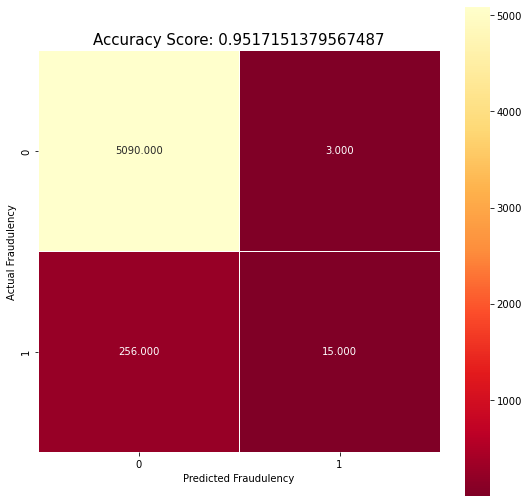

In [17]:
# Plot predicted data & original data points
# Confusion matrix
cm_regression = confusion_matrix(test_y, job_postings_pred1)

# Seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm_regression, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "YlOrRd_r");
plt.ylabel('Actual Fraudulency');
plt.xlabel('Predicted Fraudulency');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score1)
plt.title(all_sample_title, size = 15);

In [18]:
# Random Forest Model -- Classification Algorithm
job_postings_forest_model = RandomForestClassifier(random_state = 42)

# Fit the model w/ training data + Make predictions
job_postings_forest_model.fit(train_X, train_y)
job_postings_pred2 = job_postings_forest_model.predict(test_X)

# Display accuracy score of model
acc_score2 = accuracy_score(test_y, job_postings_pred2)
acc_perc2 = acc_score2 * 100
print(f"Accuracy score of Random Forest Model: {acc_perc2}%")

Accuracy score of Random Forest Model: 98.45264727815064%


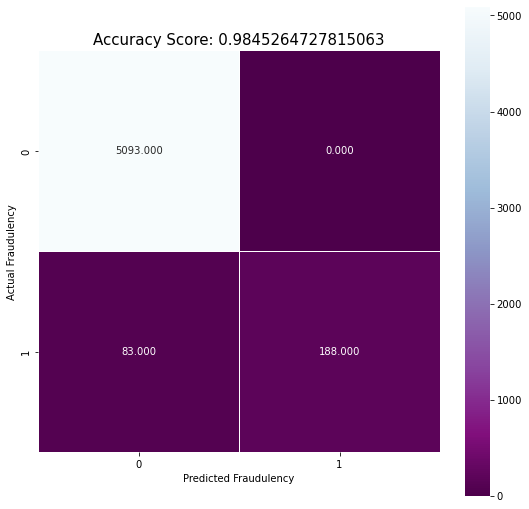

In [19]:
# Plot predicted data & original data points
# Confusion matrix
cm_forest = confusion_matrix(test_y, job_postings_pred2)

# Seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm_forest, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuPu_r');
plt.ylabel('Actual Fraudulency');
plt.xlabel('Predicted Fraudulency');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score2)
plt.title(all_sample_title, size = 15);

In [20]:
# Decision Tree Model -- Classification Algorithm
job_postings_tree_model = DecisionTreeClassifier(random_state = 42)

# Fit the model w/ training data + Make predictions
job_postings_tree_model.fit(train_X, train_y)
job_postings_pred3 = job_postings_tree_model.predict(test_X)

# Display accuracy score of model
acc_score3 = accuracy_score(test_y, job_postings_pred3)
acc_perc3 = acc_score3 * 100
print(f"Accuracy score of Decision Tree Model: {acc_perc3}%")

Accuracy score of Decision Tree Model: 97.48322147651007%


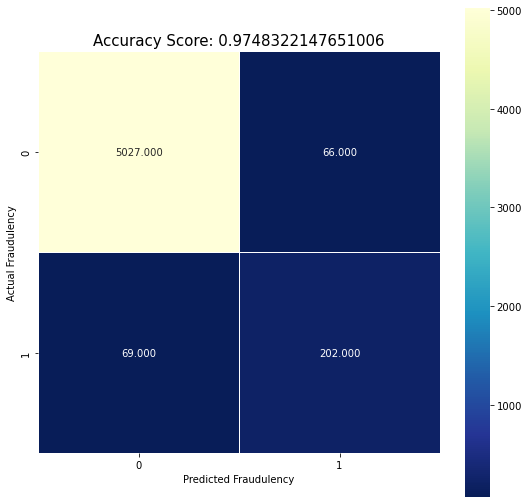

In [21]:
# Plot predicted data & original data points
# Confusion matrix
cm_tree = confusion_matrix(test_y, job_postings_pred3)

# Seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm_tree, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu_r');
plt.ylabel('Actual Fraudulency');
plt.xlabel('Predicted Fraudulency');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score3)
plt.title(all_sample_title, size = 15);

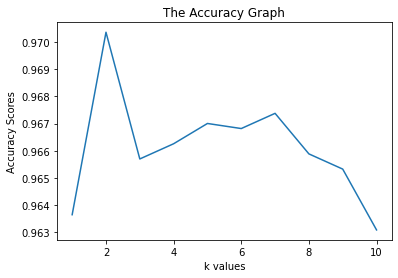

[0.9636465324384788, 0.9703579418344519, 0.9656972408650261, 0.9662565249813572, 0.9670022371364653, 0.9668158090976883, 0.9673750932140194, 0.9658836689038032, 0.9653243847874721, 0.9630872483221476]
Optimal k value: k=2


In [22]:
# K-Nearest Neighbors Model -- Classification Algorithm
# Find k with the highest accuracy
k_list = []
for k in range(1, 11):
    job_postings_neighbors_model = KNeighborsClassifier(n_neighbors = k)
    job_postings_neighbors_model.fit(train_X, train_y)
    job_postings_pred4 = job_postings_neighbors_model.predict(test_X)

    acc_score4 = accuracy_score(test_y, job_postings_pred4)
    k_list.append(acc_score4)
    
# Plot Accuracy Graph
plt.plot(range(1, 11), k_list)
plt.title("The Accuracy Graph")
plt.xlabel("k values")
plt.ylabel("Accuracy Scores")
plt.show()

print(k_list)
print("Optimal k value: k=2")

In [23]:
# From the list, k = 7 gives the best accuracy
job_postings_neighbors_model = KNeighborsClassifier(n_neighbors = 2)

# Fit the model w/ training data + Make predictions
job_postings_neighbors_model.fit(train_X, train_y)
job_postings_pred4 = job_postings_neighbors_model.predict(test_X)

# Display accuracy score of model
acc_score4 = accuracy_score(test_y, job_postings_pred4)
acc_perc4 = acc_score4 * 100
print(f"Accuracy score of K-Nearest Neighbors Model: {acc_perc4}%")

Accuracy score of K-Nearest Neighbors Model: 97.03579418344519%


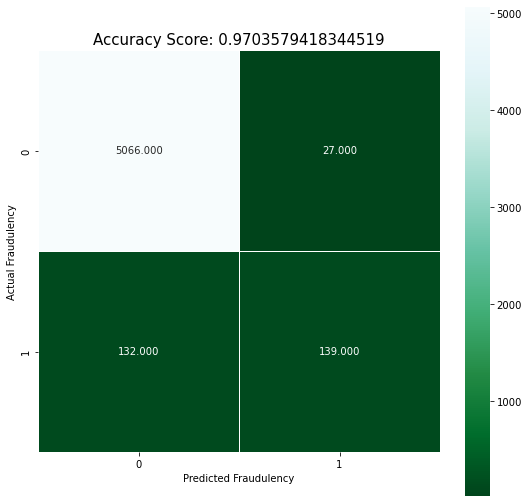

In [24]:
# Plot predicted data & original data points
# Confusion matrix
cm_neighbors = confusion_matrix(test_y, job_postings_pred4)

# Seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm_neighbors, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuGn_r');
plt.ylabel('Actual Fraudulency');
plt.xlabel('Predicted Fraudulency');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score4)
plt.title(all_sample_title, size = 15);

The Random Forest Classification Model gives the best accuracy.


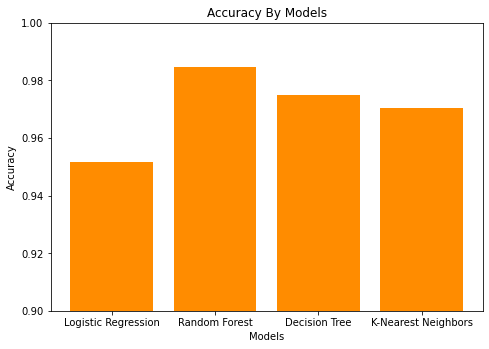

In [25]:
# Plotting to compare accuracy of 4 classification models
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors']
accuracy = [acc_score1, acc_score2, acc_score3, acc_score4]
ax.bar(models, accuracy)
ax.set_ylim([0.9, 1])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy By Models')
plt.bar(models, height = accuracy, color = 'darkorange')

print("The Random Forest Classification Model gives the best accuracy.")

In [26]:
# Re-initialize features to X object to include 'fraudulent' column
features = ['job_id', 'title', 'location', 'company_profile', 'description', 'requirements', 'telecommuting', 
            'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 
            'industry', 'function', 'fraudulent']
X = job_postings_data[features]

# Replacing missing data w/ empty string
cat_cols = list(X.columns)

# Label Encoding Categorical Features
for i in cat_cols:
    if X[i].dtype == 'object':
        X[i] = X[i].replace(np.nan, X[i].mode()[0], regex = True)
        
for i in cat_cols:
    if X[i].dtype == 'object':
        X[i] = le.fit_transform(X[i])
        
# Perform a scalar transformation of dataset
ss = StandardScaler()
X = ss.fit_transform(X)
X = DataFrame(X, columns = features)

# Clustering (unsupervised learning) does not require train/test split
print(f"No. of data sets: {X.shape[0]}")

C:\Users\HP\AppData\Local\Temp\ipykernel_3660\3547200879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP\AppData\Local\Temp\ipykernel_3660\3547200879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP\AppData\Local\Temp\ipykernel_3660\3547200879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

No. of data sets: 17880


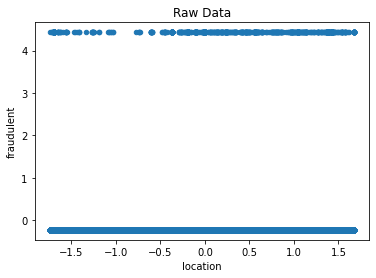

In [27]:
# K-Means Model -- Clustering Algorithm
# Distribution of raw data
plt.scatter(X['location'], X['fraudulent'], s = 20)
plt.title("Raw Data")
plt.xlabel('location')
plt.ylabel('fraudulent')
plt.show()

In [28]:
# Dimensionality reduction w/ PCA -- Why? We have a high-dimensional dataset which complicates plots
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X)
X_pca = DataFrame(data = X_pca, columns = ['title', 'location', 'company_profile', 'telecommuting', 'employment_type', 
                                           'required_experience', 'required_education', 'industry', 'function', 'fraudulent'])

# Amount of variance per component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sum_ = sum(pca.explained_variance_ratio_) * 100
print('Sum Percentage: {}%'.format(sum_))

# Display first 5 rows
X_pca.head()

Explained variation per principal component: [0.11728463 0.09008572 0.08220526 0.07563388 0.07143288 0.06800692
 0.06569113 0.06348506 0.06034521 0.05809666]
Sum Percentage: 75.22673433093539%


,title,location,company_profile,telecommuting,employment_type,required_experience,required_education,industry,function,fraudulent
0,0.297623,0.040684,0.584651,-0.108495,0.478592,-0.989891,-1.650478,0.436146,-1.406539,0.368555
1,-0.649667,-0.345873,-0.786148,-0.703251,-1.117360,-0.402972,0.227071,2.553355,-0.271575,2.122112
2,0.257832,-0.107234,-0.770579,0.167650,0.182352,-1.117510,-0.696044,0.918277,-0.535718,0.798062
3,-0.387486,-0.452729,-1.078995,-0.008668,0.187306,-0.313715,-1.077257,0.806573,-0.960487,0.091145
4,-0.442127,-0.244018,-1.235876,0.352612,0.434429,-1.487621,-0.158281,1.315872,0.241116,0.003668


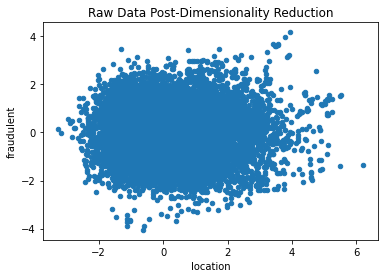

In [29]:
# Plot separable data
plt.scatter(X_pca['location'], X_pca['fraudulent'], s = 20)
plt.title("Raw Data Post-Dimensionality Reduction")
plt.xlabel('location')
plt.ylabel('fraudulent')
plt.show()

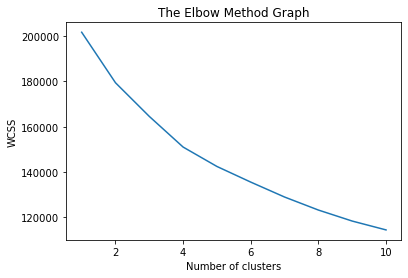

[201758.1014755684, 179443.4310352015, 164574.21757426488, 151031.52910212593, 142461.40220532476, 135552.46503451566, 128956.17391499181, 123205.99012226761, 118341.43520652025, 114429.74894177575]
Optimal k value: k=4


In [30]:
# Find # of clusters via elbow point - Elbow Method
sse = []
for k in range(1, 11):
    job_postings_means_model = KMeans(n_clusters = k)
    job_postings_means_model.fit(X_pca)

    sse.append(job_postings_means_model.inertia_)
    
# Plot Elbow Graph
plt.plot(range(1, 11), sse)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

print(sse)
print("Optimal k value: k=4")

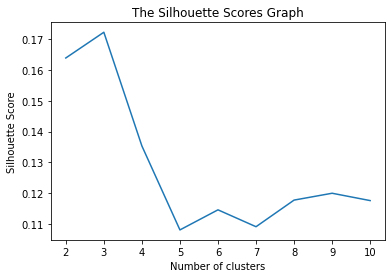

[0.16382477535079437, 0.17216251845499783, 0.13533430492589937, 0.10813207444613172, 0.11463678398263637, 0.10916828882828618, 0.1177918344014132, 0.12001098052041002, 0.11763082771162385]
Optimal k value: k=3


In [31]:
# Find # of clusters w/ highest silhouette score - Silhouette Score Method
s = []
for k in range(2, 11):
    job_postings_means_model = KMeans(n_clusters = k, random_state = 42)
    job_postings_labels1 = job_postings_means_model.fit_predict(X_pca)
    s.append(silhouette_score(X_pca, job_postings_labels1, metric = 'euclidean'))
    
# Plot Silhouette scores graph
plt.plot(range(2, 11), s)
plt.title("The Silhouette Scores Graph")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

print(s)
print("Optimal k value: k=3")

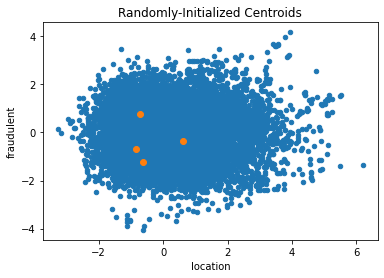

In [32]:
# Comparing both methods, k = 4 gives the optimal number of clusters
# Initializ random centroids
K = 4
centroids = X_pca.sample(n = K)
plt.scatter(X_pca['location'], X_pca['fraudulent'], s = 20)
plt.scatter(centroids['location'], centroids['fraudulent'])
plt.title("Randomly-Initialized Centroids")
plt.xlabel('location')
plt.ylabel('fraudulent')
plt.show()

In [33]:
# Iterate through each centroid & data point, calculate the distance, + assign data to a signfiicant cluster
diff = 1
j = 0
XD = X_pca
while(diff != 0):
    i = 1
    for index1,row_c in centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["location"] - row_d["location"]) ** 2
            d2 = (row_c["fraudulent"] - row_d["fraudulent"]) ** 2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X_pca[i] = ED
        i = i + 1
        
    C = []
    for index, row in X_pca.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    X_pca["Cluster"] = C
    centroids_new = X_pca.groupby(["Cluster"]).mean()[["fraudulent", "location"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (centroids_new['fraudulent'] - centroids['fraudulent']).sum() + (centroids_new['location'] - centroids['location']).sum()
        print(diff.sum())
    centroids = X_pca.groupby(["Cluster"]).mean()[["fraudulent", "location"]]

0.9788124366742821
0.707131156250435
0.477079947337021
0.3296345912636046
0.23123692629980983
0.17751326345495227
0.11081394669953165
0.09497469776985001
0.0574638600072126
0.03539316321965713
0.03546845677870514
0.03107464395149645
0.018391903805520082
0.018246986679803623
0.012592252873475984
0.013371009331145212
0.014939570930492752
0.009277736053863561
0.007284404225455121
0.008258636446797252
0.005299309661400076
0.003964769044646044
0.007228984778398728
0.005895940264366684
0.006071744031086679
0.0006495607945469217
0.0024430225372210623
0.002298932297378098
0.0010412848838141087
-0.0021299794540644568
0.00015351733821078462
0.003634662510284381
0.00385485053933432
0.003786819867966529
0.0040076375726880165
0.007662859988176229
0.004945772724322561
0.002104922980824042
0.002099357094394849
0.00558794502093285
0.005954352901079818
0.0039801700257286465
0.003770024797077276
0.001960427703160239
0.0021385287073761305
0.0031725312687094775
0.0029853934016852435
0.0034577070409329558


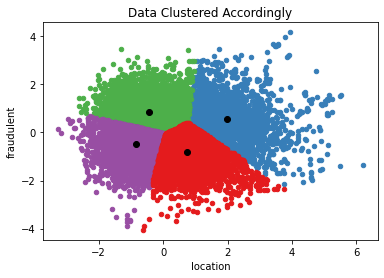

In [34]:
# Visualizing the clusters
color = ['#377eb8', '#4daf4a', '#984ea3', '#e41b1d']
for k in range(K):
    data = X_pca[X_pca["Cluster"] == k + 1]
    plt.scatter(data['location'], data['fraudulent'], s = 20, c = color[k])
plt.scatter(centroids['location'], centroids['fraudulent'], c = 'black')
plt.title("Data Clustered Accordingly")
plt.xlabel('location')
plt.ylabel('fraudulent')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


Silhouette score: 0.09669011392927356


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0.5, 1.0, 'K-Means Scatter Plot')]

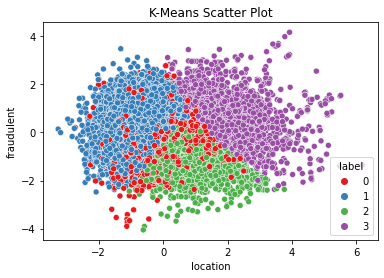

In [35]:
# K-Means Implementation
job_postings_means_model = KMeans(n_clusters = 4, random_state = 42)

# Fit the model w/ data
job_postings_means_model.fit(X_pca)

# Print silhouette score
print("Silhouette score:", silhouette_score(X_pca, job_postings_labels1))

# K-Means Scatterplot - hard assignment 
means_model_labels = job_postings_means_model.labels_
X_pca['label'] = means_model_labels
sns.scatterplot(X_pca['location'], X_pca['fraudulent'], hue = X_pca['label'], palette = 'Set1').set(title = "K-Means Scatter Plot")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only 

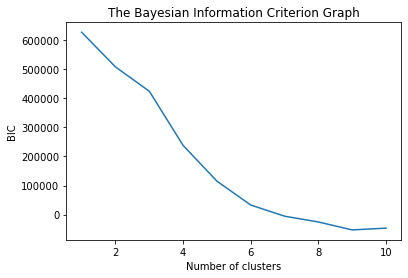

[627011.51306933, 507769.66102248256, 424154.2583997111, 237900.48752462174, 115044.95373244476, 32941.814609282876, -5381.315322821783, -25284.317454680655, -52576.000806614866, -46440.532078185446]
Optimal k value: k=10


In [36]:
# Gaussian Mixtures Model -- Clustering Algorithm
# Find # of clusters w/ lowest BIC score - EM algorithm
def determine_clusters(X_pca, K_):
    job_postings_mixture_model = GaussianMixture(n_components = K_, covariance_type = 'full', random_state = 42).fit(X_pca)
    return job_postings_mixture_model.bic(X_pca)

bic_vals = []
for k in range(1, 11):
    b = determine_clusters(X_pca, k)
    bic_vals.append(b)

# Plot Bayesian Information Criterion (BIC) graph
plt.plot(range(1, 11), bic_vals)
plt.title("The Bayesian Information Criterion Graph")
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.show()

print(bic_vals)
print("Optimal k value: k=10")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only 

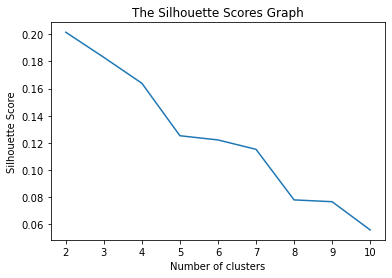

[0.20145315608313913, 0.18295435902500728, 0.16387615754795415, 0.12524593562975816, 0.12216306638900436, 0.11524442458308276, 0.07800743028786211, 0.07667697539681498, 0.05590716313305947]
Optimal k value: k=4


In [37]:
# Find # of clusters w/ highest silhouette score - Silhouette Score method
s = []
for k in range(2, 11):
    job_postings_mixture_model = GaussianMixture(n_components = k, random_state = 42)
    job_postings_labels2 = job_postings_mixture_model.fit_predict(X_pca)
    s.append(silhouette_score(X_pca, job_postings_labels2, metric = 'euclidean'))
    
# Plot Silhouette scores graph
plt.plot(range(2, 11), s)
plt.title("The Silhouette Scores Graph")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

print(s)
print("Optimal k value: k=4")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


Silhouette score: 0.16387615754795415


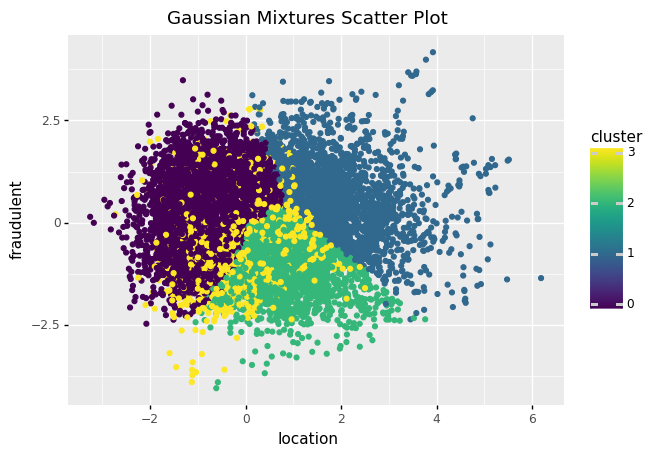

<ggplot: (96645322638)>

In [38]:
# Comparing both methods, k = 4 gives the optimal number of clusters
job_postings_mixture_model = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = 42)

# Fit the model w/ training data + Make predictions
job_postings_mixture_model.fit(X_pca)
job_postings_labels2 = job_postings_mixture_model.predict(X_pca)

# Print silhouette score
print("Silhouette score:", silhouette_score(X_pca, job_postings_labels2))

# Gaussian Mixtures Scatter Plot - soft assignment
X_pca['cluster'] = job_postings_labels2
(ggplot(X_pca, aes(x = "location", y = "fraudulent", color = "cluster")) + geom_point() + ggtitle("Gaussian Mixtures Scatter Plot"))

In [39]:
# Conclusions
# Classification Models --> Random Forest returned the best accuracy score of 0.98
# Clustering Models --> Gaussian Mixtures returned the best silhouette score of 0.1